<a href="https://colab.research.google.com/github/ShuimuZeng/COMP338/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

In [ ]:
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving victoria1.jpg to victoria1.jpg


Saving victoria2.jpg to victoria2.jpg


In [ ]:
# Load the two images
# image1 = cv2.imread('victoria1.jpg', cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread('victoria2.jpg', cv2.IMREAD_GRAYSCALE)

image1 = cv2.imread('victoria1.jpg')
image2 = cv2.imread('victoria2.jpg')


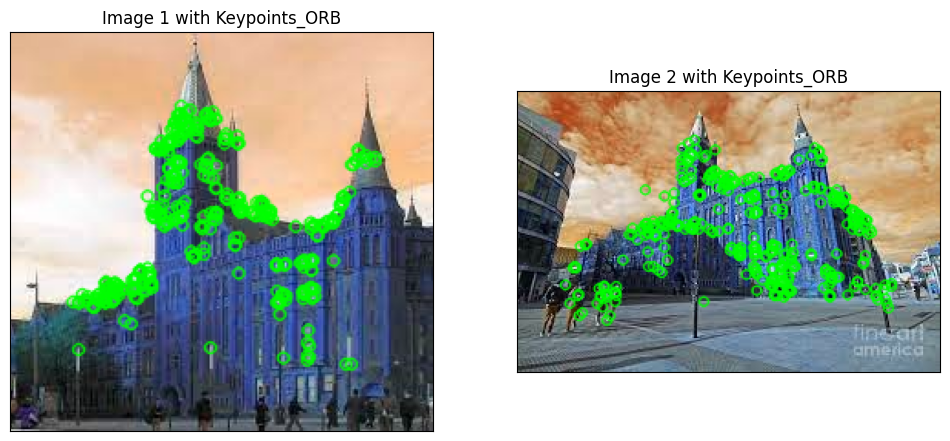

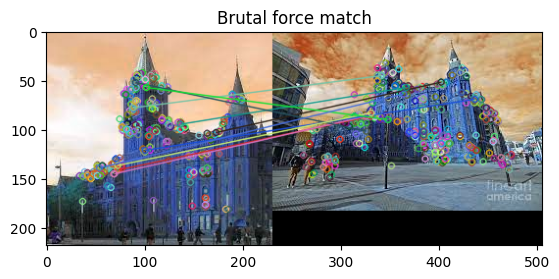

True

In [ ]:
# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Create copies of the original images for visualization
image1_with_keypoints_ORB = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)
image2_with_keypoints_ORB = cv2.drawKeypoints(image2, keypoints2, None, color=(0, 255, 0), flags=0)

# Visualize the images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image1_with_keypoints_ORB), plt.title('Image 1 with Keypoints_ORB')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image2_with_keypoints_ORB), plt.title('Image 2 with Keypoints_ORB')
plt.xticks([]), plt.yticks([]),plt.show()
cv2.imwrite('victoria1.jpg',image1_with_keypoints_ORB)
cv2.imwrite('victoria2.jpg',image2_with_keypoints_ORB)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match keypoints
matches_orb = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw the first 10 matches
result_orb = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_orb[:10], outImg=None)

# Define a matching threshold for correct matches
matching_threshold = 0.8

# Display the ORB matching results
plt.imshow(result_orb),plt.title('Brutal force match')


plt.show()
cv2.imwrite('Brutal force match ORB.jpg',result_orb)

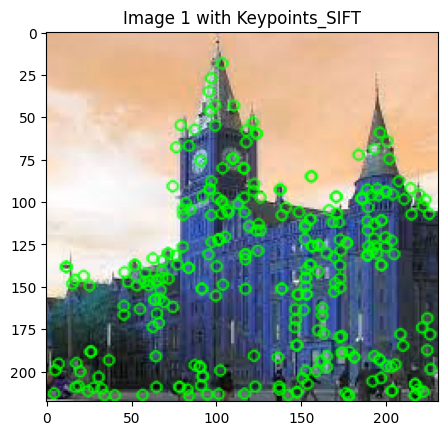

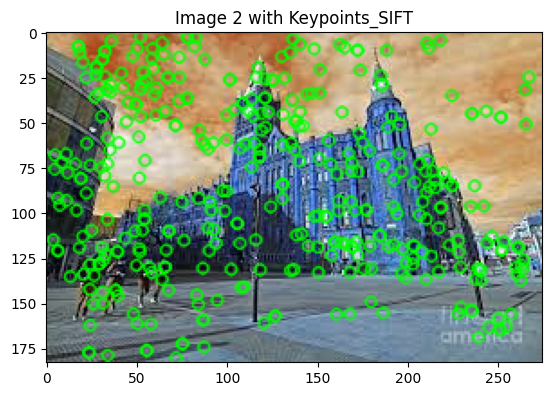

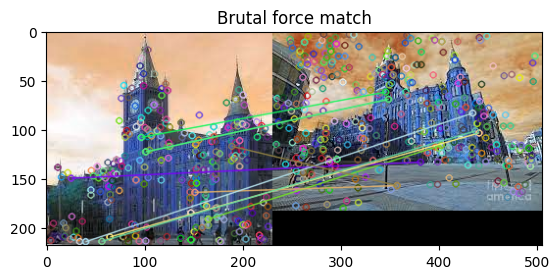

True

In [ ]:
# intialize sift

sift = cv2.SIFT_create()

# Extract keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create copies of the original images for visualization
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, color=(0, 255, 0), flags=0)

plt.imshow(image1_with_keypoints), plt.title('Image 1 with Keypoints_SIFT')

plt.show()

plt.imshow(image2_with_keypoints), plt.title('Image 2 with Keypoints_SIFT')

plt.show()

cv2.imwrite('victoria1_SIFT.jpg',image1_with_keypoints)
cv2.imwrite('victoria2_SIFT.jpg',image2_with_keypoints)

# Create a Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match keypoints
matches_sift = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Draw the first 10 matches
result_sift = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_sift[:10], outImg=None)

plt.imshow(result_sift),plt.title('Brutal force match')

plt.show()

cv2.imwrite('Brutal Force match_SIFT.jpg',result_sift)



In [ ]:
#Justification
def evaluate_performance(img1, img2, detector, matcher):
    # Find keypoints and descriptors
    kp1, des1 = detector.detectAndCompute(img1, None)
    kp2, des2 = detector.detectAndCompute(img2, None)

    # Match descriptors
    matches = matcher.match(des1, des2)

    # Calculate distances
    distances = [match.distance for match in matches]

    # Calculate precision, recall, and F1 score
    threshold = 0.8 * max(distances)
    true_positives = sum(1 for distance in distances if distance < threshold)
    false_positives = len(distances) - true_positives
    actual_positives = min(len(des1), len(des2))
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / actual_positives
    f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score, distances

# Load the images
img1 = cv2.imread('victoria1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('victoria2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector and BFMatcher
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Evaluate ORB performance
precision_orb, recall_orb, f1_score_orb, distances_orb = evaluate_performance(img1, img2, orb, bf)

# Display ORB metrics
print("ORB Metrics:")
print("Precision:", precision_orb)
print("Recall:", recall_orb)
print("F1 Score:", f1_score_orb)

# # Initialize SIFT detector and BFMatcher

# sift = cv2.SIFT_create()

# # Evaluate SIFT performance
# precision_sift, recall_sift, f1_score_sift, distances_sift = evaluate_performance(img1, img2, sift, bf)

# # Display SIFT metrics
# print("\nSIFT Metrics:")
# print("Precision:", precision_sift)
# print("Recall:", recall_sift)
# print("F1 Score:", f1_score_sift)

ORB Metrics:
Precision: 0.6982758620689655
Recall: 0.2040302267002519
F1 Score: 0.31578947368421056


In [ ]:
def evaluate_performance(img1, img2, detector, matcher):
    # Find keypoints and descriptors
    kp1, des1 = detector.detectAndCompute(img1, None)
    kp2, des2 = detector.detectAndCompute(img2, None)

    # Match descriptors
    matches = matcher.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Calculate distances
    distances = np.array([match.distance for match in good_matches], dtype=np.float32).reshape(-1, 1)

    # Normalize distances to be in the range [0, 1]
    cv2.normalize(distances, distances, 0, 1, cv2.NORM_MINMAX)

    # Calculate precision, recall, and F1 score
    threshold = 0.8  # Adjust this threshold as needed
    true_positives = np.sum(distances < threshold)
    false_positives = len(distances) - true_positives
    actual_positives = min(len(des1), len(des2))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / actual_positives
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score, distances

# Load the images
img1 = cv2.imread('victoria1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('victoria2.jpg', cv2.IMREAD_GRAYSCALE)


# Initialize SIFT detector and BFMatcher
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()

# Evaluate SIFT performance
precision_sift, recall_sift, f1_score_sift, distances_sift = evaluate_performance(img1, img2, sift, bf)

# Display SIFT metrics
print("\nSIFT Metrics:")
print("Precision:", precision_sift)
print("Recall:", recall_sift)
print("F1 Score:", f1_score_sift)


SIFT Metrics:
Precision: 1.0
Recall: 0.0029411764705882353
F1 Score: 0.005865102639296188
